In [26]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [27]:
r = requests.get("http://192.168.15.131:5000/api/v0.01/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)

In [58]:
df = pd.read_json(json.dumps(register))

In [59]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


In [54]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [60]:
df.shape

(1575, 7)

In [61]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


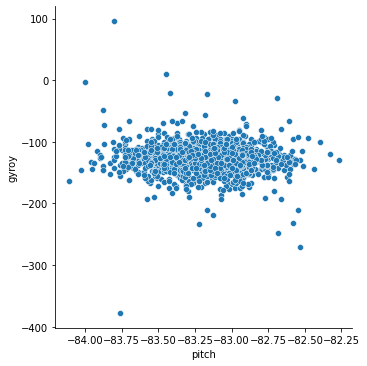

In [62]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [34]:
10 > -100

True

In [35]:
-150 > -200

True

In [63]:
for x in range(len(df)):
    if 200.0 > df["gyroy"][x] > -100.0:
        df["up"] = 1
    else:
        df["up"] = 0 
    
    if -150.0 > df["gyroy"][x] > -200.0:
        df["up"] = 1
    else:
        df["up"] = 0

In [64]:
x = df[["gyroy", "kalangley", "pitch"]]
y = df["up"]

In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: up, dtype: int64

In [66]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[:75]
teste_y = y[:75]

In [67]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0